In [8]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [9]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [1]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=20, include_bias=False)
X_poly = poly_features.fit_transform(X)

NameError: name 'X' is not defined

In [2]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

NameError: name 'X_poly' is not defined

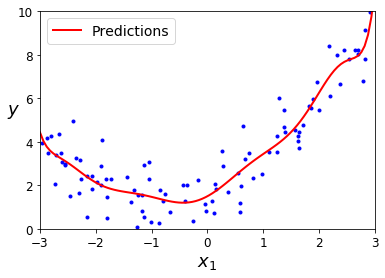

In [12]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


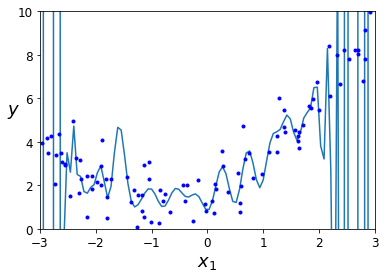

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
#We are buildling a model y = (beta1 * X**2) + (beta2 * X) + beta3
#Our task is to approximate the values of beta1, beta2 and beta3

#PolynomialFeatures returns the design matrix X for the specified degree, see Matrix Algebra explanation given here: https://en.wikipedia.org/wiki/Polynomial_regression
poly_features = PolynomialFeatures(degree=300, include_bias=False)

std_scaler = StandardScaler()

#build the regression line using the features array
lin_reg = LinearRegression()

polynomial_regression = Pipeline((
            ("poly_features", poly_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ))
polynomial_regression.fit(X, y)
y_predict = polynomial_regression.predict(X_new)
plt.plot(X_new, y_predict)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()